<a href="https://colab.research.google.com/github/radhika1234567/Age-related-condition/blob/main/Copy_of_Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix


In [98]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
cd "/content/drive/My Drive/Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


In [101]:
train_df=pd.read_csv("cleaned_data")

In [102]:
X=train_df.iloc[:,1:57]

In [103]:
y=train_df.iloc[:,57]

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

In [107]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [108]:
test_df=pd.read_csv("test.csv")

In [109]:
test_df

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
test_df['EJ']=test_df['EJ'].map({'A':0,'B':1})

In [111]:
tf = test_df.drop(columns=['Id'],axis=0)
tf = sc.transform(tf)

In [112]:
tf

array([[-0.9788175 , -1.72291248, -0.99672109, -0.54800202, -1.14023836,
        -2.14150453, -0.13760173, -2.53937081, -0.12035743, -1.6528695 ,
        -6.13232133, -1.22870953, -1.04246972, -0.15423768, -0.24229634,
        -0.53178971, -2.68743142, -1.68731984, -0.78465512, -2.15736471,
        -0.83582088, -2.66200781, -2.48931569, -2.6598581 , -1.80695825,
        -2.463446  , -1.26910087, -0.30371248, -3.25890733, -1.7048489 ,
        -3.24377683, -3.30871997, -0.18693721, -1.56515612, -1.45648218,
        -1.59573437, -1.54879302, -0.92746989, -0.14960362, -1.34801441,
        -1.89667705, -1.77825867, -0.18470232, -0.40987447, -0.09946195,
        -0.88322035, -3.39939605, -0.45251902, -0.07188646, -0.30256109,
        -2.06470328, -0.89812054, -0.77880984, -3.19568862, -1.40554018,
        -0.82191751],
       [-0.9788175 , -1.72291248, -0.99672109, -0.54800202, -1.14023836,
        -2.14150453, -0.13760173, -2.53937081, -0.12035743, -1.6528695 ,
        -6.13232133, -1.22870

In [113]:
from imblearn.over_sampling import SMOTE

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [115]:
from collections import Counter
Counter(y_train)

Counter({0: 407, 1: 86})

In [116]:
os=SMOTE(random_state=2)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 407, 1: 86})
The number of classes after fit Counter({0: 407, 1: 407})


In [117]:
from sklearn import metrics
def plot_roc_curve(y_test, y_pred):
    auc = metrics.roc_auc_score(y_test, y_pred)
    false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
    plt.figure(figsize=(10, 8), dpi=100)
    plt.axis('scaled')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title("AUC & ROC Curve")
    plt.plot(false_positive_rate, true_positive_rate, 'g')
    #plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
    plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

In [118]:
#calculate precision and recall
def plot_precision_recall_curve(y_test, y_pred):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

    #create precision recall curve
    fig, ax = plt.subplots()
    ax.plot(recall, precision, color='purple')

    #add axis labels to plot
    ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')

    #display plot
    plt.show()

In [119]:
from sklearn.pipeline import Pipeline

In [120]:
from sklearn.model_selection import RandomizedSearchCV

In [121]:
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [2,4,6,10,15,20],
              'n_estimators' : [50,100,150,1000],
              'learning_rate' : [0.1,0.3,0.5,0.6,0.8],
              'min_child_weight' : [1,3,5,7],
              'subsample':[0.6,0.7,0.8,0.9,1]
             }
st_kf=StratifiedKFold( n_splits=5)
xgbc_random = RandomizedSearchCV(xgbc, xgbc_param,cv=st_kf, return_train_score=True,scoring = 'roc_auc',n_iter=100,random_state=42 )
#xgbc_grid.fit(X_train_ns,y_train_ns,eval_set = (X_test, y_test))
eval_set = [(X_test, y_test)]
xgbc_random.fit(X_train_ns, y_train_ns,eval_metric="logloss", eval_set=eval_set, verbose=True)
#xgbc_random.fit(X_train_ns, y_train_ns)

Streaming output truncated to the last 5000 lines.
[10]	validation_0-logloss:0.30931
[11]	validation_0-logloss:0.28530
[12]	validation_0-logloss:0.28094
[13]	validation_0-logloss:0.27411
[14]	validation_0-logloss:0.27676
[15]	validation_0-logloss:0.27361
[16]	validation_0-logloss:0.27842
[17]	validation_0-logloss:0.27497
[0]	validation_0-logloss:0.51904
[1]	validation_0-logloss:0.45941
[2]	validation_0-logloss:0.42652
[3]	validation_0-logloss:0.40306
[4]	validation_0-logloss:0.38264
[5]	validation_0-logloss:0.36033
[6]	validation_0-logloss:0.35812
[7]	validation_0-logloss:0.34653
[8]	validation_0-logloss:0.31390
[9]	validation_0-logloss:0.31027
[10]	validation_0-logloss:0.31487
[11]	validation_0-logloss:0.29367
[12]	validation_0-logloss:0.28679
[13]	validation_0-logloss:0.27752
[14]	validation_0-logloss:0.27766
[15]	validation_0-logloss:0.26762
[16]	validation_0-logloss:0.26494
[17]	validation_0-logloss:0.26312
[18]	validation_0-logloss:0.26489
[19]	validation_0-logloss:0.25527
[20]	va

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=2,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importan...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.1, 0.3, 0.5, 0.6,
                                                          0.8],
                                        'max_depth': [2, 4, 6, 10, 15, 20],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [50, 100, 150, 1000],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1]},
                   random_state=42, return_train_score=True, scoring='roc_auc')

In [122]:
print("Best parameters: {}".format(xgbc_random.best_params_))

Best parameters: {'subsample': 0.9, 'n_estimators': 1000, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.1}


In [123]:
pipe3 = Pipeline([

   ('classifier', XGBClassifier(subsample= 0.6,
                                n_estimators= 1000,
                                min_child_weight= 1,
                                max_depth= 4,
                                learning_rate= 0.3,
                                random_state=42))

])

In [124]:
pipe3.fit(X_train_ns, y_train_ns)
from sklearn.metrics import classification_report, confusion_matrix
y_pred=pipe3.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[100   2]
 [  5  17]]
0.9435483870967742
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       102
           1       0.89      0.77      0.83        22

    accuracy                           0.94       124
   macro avg       0.92      0.88      0.90       124
weighted avg       0.94      0.94      0.94       124



In [125]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve
print('Accuracy: %.3f' % accuracy_score(y_test, pipe3.predict(X_test)))
from sklearn.metrics import log_loss
logloss = log_loss(y_test, pipe3.predict_proba(X_test))
print("logloss: ",round(logloss,3))
f1= f1_score(y_test,pipe3.predict(X_test), average='binary')
print("F1-score: ", round(f1,4))
print('Precision: %.3f' % precision_score(y_test, pipe3.predict(X_test)))
print('Recall: %.3f' % recall_score(y_test, pipe3.predict(X_test)))

Accuracy: 0.944
logloss:  0.153
F1-score:  0.8293
Precision: 0.895
Recall: 0.773


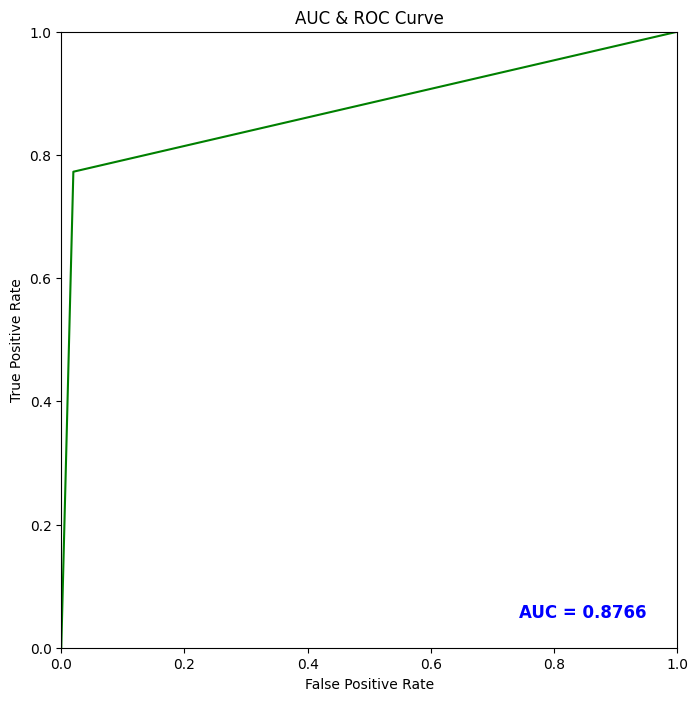

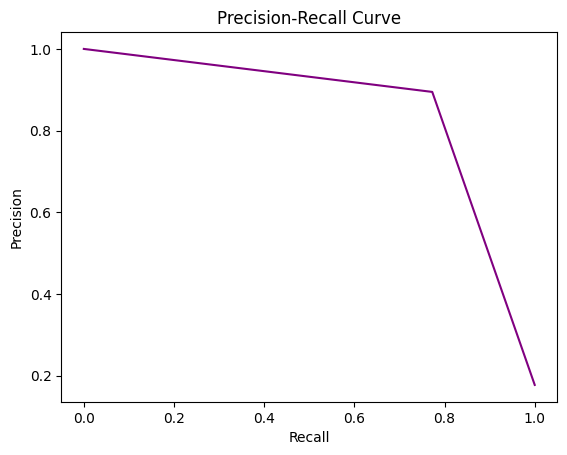

In [126]:
plot_roc_curve(y_test, pipe3.predict(X_test))
plot_precision_recall_curve(y_test, pipe3.predict(X_test))

In [127]:
data_pipe = Pipeline([

   ('classifier', XGBClassifier(subsample= 0.9,
                                n_estimators= 1000,
                                min_child_weight= 5,
                                max_depth= 6,
                                learning_rate= 0.1,
                                random_state=42))

])

In [128]:
data_pipe.fit(X_train_ns, y_train_ns)

Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None, min_child_weight=5,
                               missing=nan, monotone_constraints=None,
                               n_estimators=1000, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=42, ...))])

In [129]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred=data_pipe.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[99  3]
 [ 4 18]]
0.9435483870967742
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       102
           1       0.86      0.82      0.84        22

    accuracy                           0.94       124
   macro avg       0.91      0.89      0.90       124
weighted avg       0.94      0.94      0.94       124



In [130]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve
print('Accuracy: %.3f' % accuracy_score(y_test, data_pipe.predict(X_test)))
from sklearn.metrics import log_loss
logloss = log_loss(y_test, data_pipe.predict_proba(X_test))
print("logloss: ",round(logloss,3))
f1= f1_score(y_test,data_pipe.predict(X_test), average='binary')
print("F1-score: ", round(f1,4))
print('Precision: %.3f' % precision_score(y_test, data_pipe.predict(X_test)))
print('Recall: %.3f' % recall_score(y_test, data_pipe.predict(X_test)))

Accuracy: 0.944
logloss:  0.185
F1-score:  0.8372
Precision: 0.857
Recall: 0.818


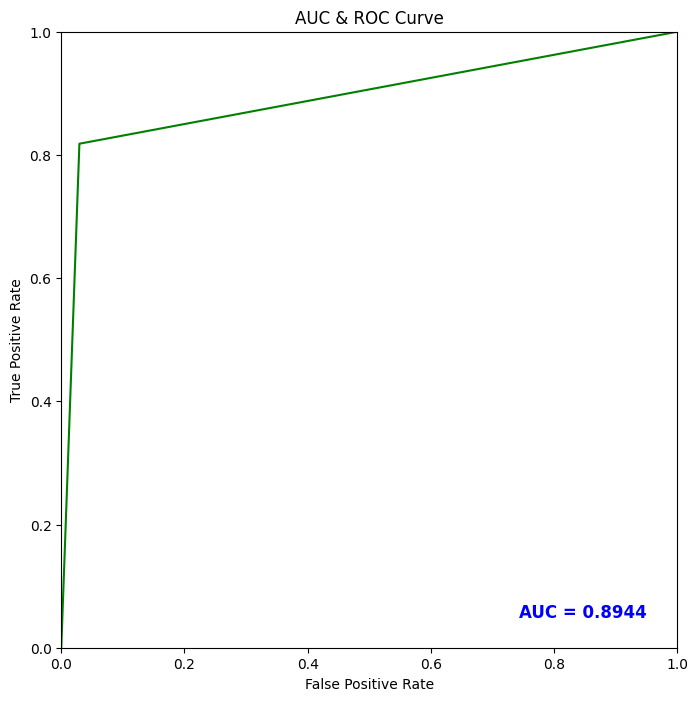

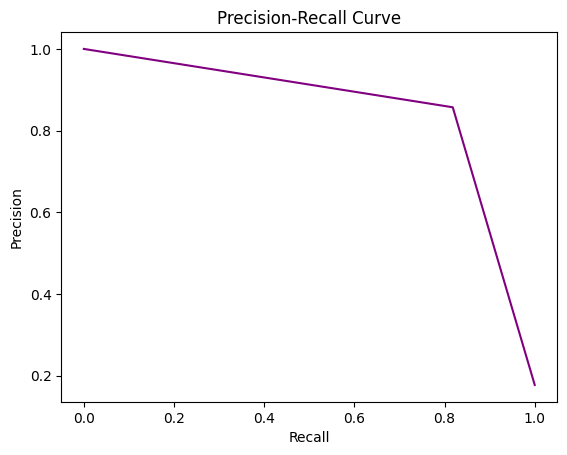

In [131]:
plot_roc_curve(y_test, data_pipe.predict(X_test))
plot_precision_recall_curve(y_test, data_pipe.predict(X_test))

In [ ]:
## Predictions

In [133]:
preds = pipe3.predict_proba(tf)
preds

array([[0.98651046, 0.01348957],
       [0.98651046, 0.01348957],
       [0.98651046, 0.01348957],
       [0.98651046, 0.01348957],
       [0.98651046, 0.01348957]], dtype=float32)

In [134]:
import seaborn as sns      # supports matplotlib in rendering good and beautiful charts.

In [139]:
model= XGBClassifier(subsample= 0.6,
                                n_estimators= 1000,
                                min_child_weight= 1,
                                max_depth= 4,
                                learning_rate= 0.3,
                                random_state=42)

In [140]:
model.fit(X_train_ns, y_train_ns)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [141]:
from matplotlib import pyplot
from xgboost import plot_importance
from xgboost import XGBClassifier
from xgboost import XGBClassifier, plot_importance

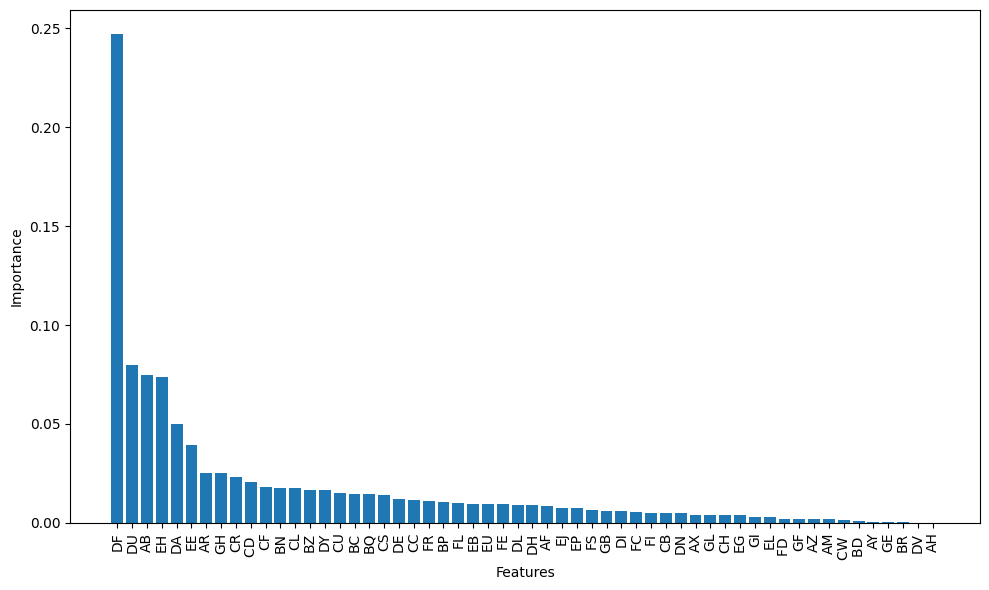

In [142]:
importances = model.feature_importances_
top_indices = importances.argsort()[::-1][:]
top_feature_names = X.columns[top_indices]
top_importances = importances[top_indices]

plt.figure(figsize = (10, 6))
plt.bar(range(len(top_feature_names)), top_importances)
plt.xticks(range(len(top_feature_names)), top_feature_names, rotation = 90)
plt.xlabel('Features')
plt.ylabel('Importance')
#plt.title('Top 20 Feature Importance')
plt.tight_layout()
plt.show()

In [143]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort


In [144]:
thresholds = sort(model.feature_importances_)

In [145]:
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_ns)
    # train model
    selection_model = XGBClassifier(subsample= 0.6,
                                n_estimators= 1000,
                                min_child_weight= 1,
                                max_depth= 4,
                                learning_rate= 0.3,
                                random_state=42)
    selection_model.fit(select_X_train, y_train_ns)
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    y_pred1 = selection_model.predict_proba(select_X_test)
    predictions = [round(value) for value in y_pred]
    prediction = [value for value in y_pred1]
    accuracy = accuracy_score(y_test, predictions)
    logloss = round(log_loss(y_test, prediction),3)
    Precisionscore = precision_score(y_test, predictions)
    f1score = f1_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%, logloss=%.3f, precisionscore=%.3f, F1score=%.3f, recall=%.3f" % (thresh, select_X_train.shape[1], accuracy*100.0, logloss, Precisionscore, f1score, recall))

Thresh=0.000, n=56, Accuracy: 94.35%, logloss=0.153, precisionscore=0.895, F1score=0.829, recall=0.773
Thresh=0.000, n=56, Accuracy: 94.35%, logloss=0.153, precisionscore=0.895, F1score=0.829, recall=0.773
Thresh=0.000, n=54, Accuracy: 94.35%, logloss=0.153, precisionscore=0.895, F1score=0.829, recall=0.773
Thresh=0.000, n=53, Accuracy: 95.16%, logloss=0.152, precisionscore=0.900, F1score=0.857, recall=0.818
Thresh=0.001, n=52, Accuracy: 95.16%, logloss=0.140, precisionscore=0.900, F1score=0.857, recall=0.818
Thresh=0.001, n=51, Accuracy: 95.16%, logloss=0.142, precisionscore=0.900, F1score=0.857, recall=0.818
Thresh=0.002, n=50, Accuracy: 94.35%, logloss=0.189, precisionscore=0.857, F1score=0.837, recall=0.818
Thresh=0.002, n=49, Accuracy: 92.74%, logloss=0.193, precisionscore=0.810, F1score=0.791, recall=0.773
Thresh=0.002, n=48, Accuracy: 94.35%, logloss=0.154, precisionscore=0.857, F1score=0.837, recall=0.818
Thresh=0.002, n=47, Accuracy: 94.35%, logloss=0.153, precisionscore=0.857